In [2]:
'''
SYARAT
--> Untuk width = 5, nilai hasil smoothing pada indeks n adalah
    rata-rata dari x[n-2], x[n-1], x[n], x[n+1], x[n+2]
--> Secara umum: smoothed[n] = mean(x[n-k : n+k+1]) dimana k = (width-1)//2
--> Jika width genap, TIDAK ubah menjadi ganjil
--> Gunakan asymmetric window yang condong ke depan. Contoh:
    untuk width = 4, gunakan window [n-1, n, n+1, n+2]
--> Untuk posisi di dekat awal/akhir array, gunakan window yang
    tersedia. Contoh: untuk width = 5 di n = 0,
    gunakan mean(x[0:3])
--> Pastikan panjang output sama dengan input
--> Data yang digunakan:
    a. Generate x = 200 titik merata dari 0 sampai 100
    b. Hitung f(x) = x2
    c. Tambahkan noise: y_noisy = x2 + randn
    d. Gunakan np.random.seed(42) untuk hasil yang reproducible
--> Output yang diharapkan:
    a. Titik-titik data noisy (scatter plot)
    b. Garis fungsi asli f(x) = x2
    c. Garis hasil smoothing dengan beberapa window size (contoh:
    3, 5, 7, 10)
    d. Legenda, judul, dan label sumbu
''' 

'\nSYARAT\n--> Untuk width = 5, nilai hasil smoothing pada indeks n adalah\n    rata-rata dari x[n-2], x[n-1], x[n], x[n+1], x[n+2]\n--> Secara umum: smoothed[n] = mean(x[n-k : n+k+1]) dimana k = (width-1)//2\n--> Jika width genap, TIDAK ubah menjadi ganjil\n--> Gunakan asymmetric window yang condong ke depan. Contoh:\n    untuk width = 4, gunakan window [n-1, n, n+1, n+2]\n--> Untuk posisi di dekat awal/akhir array, gunakan window yang\n    tersedia. Contoh: untuk width = 5 di n = 0,\n    gunakan mean(x[0:3])\n--> Pastikan panjang output sama dengan input\n--> Data yang digunakan:\n    a. Generate x = 200 titik merata dari 0 sampai 100\n    b. Hitung f(x) = x2\n    c. Tambahkan noise: y_noisy = x2 + randn\n    d. Gunakan np.random.seed(42) untuk hasil yang reproducible\n--> Output yang diharapkan:\n    a. Titik-titik data noisy (scatter plot)\n    b. Garis fungsi asli f(x) = x2\n    c. Garis hasil smoothing dengan beberapa window size (contoh:\n    3, 5, 7, 10)\n    d. Legenda, judul,

In [3]:
#Setup
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
#buat x dan noise
np.random.seed(42) #biar producable
x = np.linspace(0,100,200) #200 titik, nilai merata 0-100
noise = np.random.randn(len(x))

[  0.           0.50251256   1.00502513   1.50753769   2.01005025
   2.51256281   3.01507538   3.51758794   4.0201005    4.52261307
   5.02512563   5.52763819   6.03015075   6.53266332   7.03517588
   7.53768844   8.04020101   8.54271357   9.04522613   9.54773869
  10.05025126  10.55276382  11.05527638  11.55778894  12.06030151
  12.56281407  13.06532663  13.5678392   14.07035176  14.57286432
  15.07537688  15.57788945  16.08040201  16.58291457  17.08542714
  17.5879397   18.09045226  18.59296482  19.09547739  19.59798995
  20.10050251  20.60301508  21.10552764  21.6080402   22.11055276
  22.61306533  23.11557789  23.61809045  24.12060302  24.62311558
  25.12562814  25.6281407   26.13065327  26.63316583  27.13567839
  27.63819095  28.14070352  28.64321608  29.14572864  29.64824121
  30.15075377  30.65326633  31.15577889  31.65829146  32.16080402
  32.66331658  33.16582915  33.66834171  34.17085427  34.67336683
  35.1758794   35.67839196  36.18090452  36.68341709  37.18592965
  37.68844

In [20]:
#Buat fungsi y_asli dan y_noisy
def f(x):
    return x**2
y_noise = f(x)+ noise

In [6]:
def moving_average_filter(width):
    panjang = len(x)
    list_y_new = []
    for i in range(panjang):
        if width%2 == 1: #--> Ganjil
            k = (width-1)//2
            start = max(i-k,0)
            end = min(i+k+1, panjang)
        else: #--> Genap
            k= width//2 
            start= max(i-k-1,0) #condong depan
            end= min(i+k,panjang)
        y_new = np.mean(y_noise[start:end]) #smoothed
        list_y_new.append(y_new)
    return list_y_new

Text(0.5, 1.0, 'Moving Average Filter')

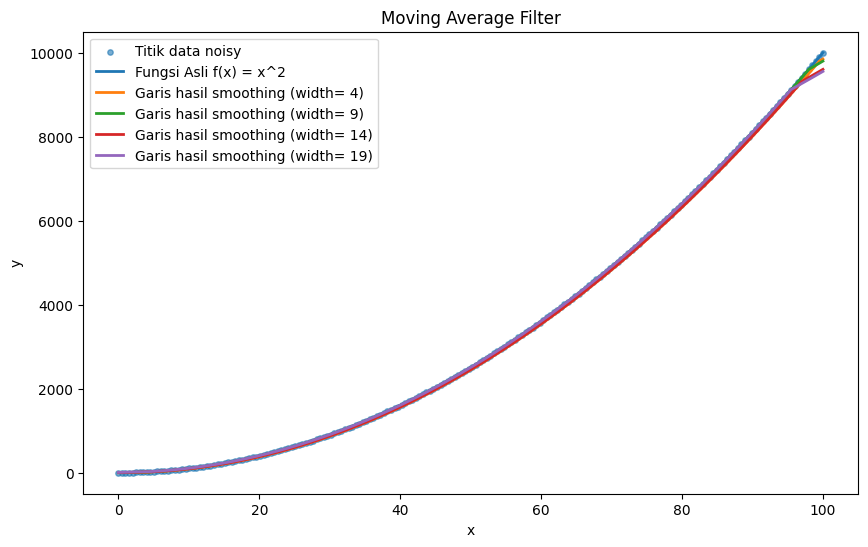

In [14]:
plt.figure(figsize=(10,6))
#Titik data noisy
plt.scatter(x, y_noise, s=15, alpha=0.6, label= 'Titik data noisy')
#Garis fungsi asli f(x) = x2
plt.plot(x,f(x),linewidth=2, label= 'Fungsi Asli f(x) = x^2')
#Garis hasil smoothing dengan beberapa window size (contoh: 3, 5, 7, 10)
window= [4,9,14,19]
for i in window:
    plt.plot(x,moving_average_filter(i), linewidth= 2, label= f'Garis hasil smoothing (width= {i})')



#Legenda, judul, dan label sumbu
plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.title('Moving Average Filter')